In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import *

from sklearn import * 
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import *
from sklearn.preprocessing import *
from sklearn.datasets import *
from sklearn.cluster import *

from scipy.cluster.hierarchy import *

from scipy import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False
# 윈도우
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
power_data = pd.read_excel('./data/시도별_용도별.xls')
print(power_data.shape)
power_data = power_data.set_index('구분')
power_data = power_data.drop(['합계', '개성', '경기', '서울'], axis=0, errors='ignore') 
power_data = power_data.drop('합계', axis=1) ## 열단위로 삭제
power_data.tail(2)  ## 전처리 : 필터링

(19, 28)


,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,
충남,2691823,1089613,7164439,8254052,1928066,248313,37057955,1137035,269998,134109,...,565003,611925,12208,428906,10953811,2526658,33766,53804,19725,39234334
충북,2027281,1267140,4804638,6071778,721131,139856,15883448,1152073,333846,51682,...,738699,366871,23076,1125141,4103832,603349,82496,513501,46038,16744435


In [4]:
power = power_data[['서비스업', '제조업']] ## 전처리 : 축소
power.head(2)

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778


In [5]:
from sklearn.cluster import *
from scipy.cluster.hierarchy import *

link_dist = linkage(power, metric='euclidean', method='ward')
## 유클리디안 거리법을 이용한 유사도 계산 
link_dist

array([[0.00000000e+00, 4.00000000e+00, 7.46490444e+05, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 8.37460840e+05, 2.00000000e+00],
       [7.00000000e+00, 1.20000000e+01, 2.08750703e+06, 2.00000000e+00],
       [9.00000000e+00, 1.10000000e+01, 2.32242339e+06, 2.00000000e+00],
       [6.00000000e+00, 1.50000000e+01, 2.71835602e+06, 3.00000000e+00],
       [1.40000000e+01, 1.80000000e+01, 3.97556707e+06, 3.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 3.98077493e+06, 4.00000000e+00],
       [1.00000000e+00, 1.00000000e+01, 4.51929196e+06, 2.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 6.42807846e+06, 2.00000000e+00],
       [2.00000000e+01, 2.20000000e+01, 9.62487446e+06, 5.00000000e+00],
       [1.30000000e+01, 2.30000000e+01, 1.05362448e+07, 3.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.12250792e+07, 7.00000000e+00],
       [2.40000000e+01, 2.50000000e+01, 2.88055419e+07, 8.00000000e+00],
       [2.60000000e+01, 2.70000000e+01, 4.93010586e

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [96.25, 96.25, 132.5, 132.5],
  [31.25, 31.25, 114.375, 114.375]],
 'dcoord': [[0.0, 746490.4440982483, 746490.4440982483, 0.0],
  [0.0, 2718356.017206601, 2718356.017206601, 746490.4440982483],
  [0.0, 837460.8404749442, 837460.8404749442, 0.0],
  [0.0, 2087507.0349795232, 2087507.0349795232, 0.0],
  [837460.8404749442,
   3980774.927181138,
   3980774.927181138,
   2087507.0349795232],
  [2718356.017206601,
   11225079.200505616,
   11225079.200505616,
   3980774.927181138],
  [0.0, 2322423.3897127802, 2322423.3897127802, 0.0],
  [0.0, 3975567.0690602534, 3975567.0690602534, 2322423.3897127802],
  [0.0, 4519291.9622423155, 4519291

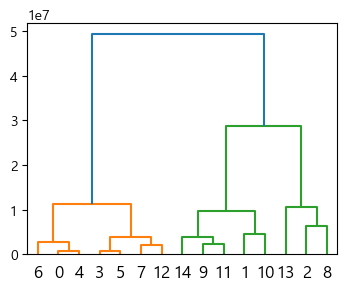

In [6]:
plt.figure(figsize=(4, 3))
dendrogram(link_dist)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [96.25, 96.25, 132.5, 132.5],
  [31.25, 31.25, 114.375, 114.375]],
 'dcoord': [[0.0, 746490.4440982483, 746490.4440982483, 0.0],
  [0.0, 2718356.017206601, 2718356.017206601, 746490.4440982483],
  [0.0, 837460.8404749442, 837460.8404749442, 0.0],
  [0.0, 2087507.0349795232, 2087507.0349795232, 0.0],
  [837460.8404749442,
   3980774.927181138,
   3980774.927181138,
   2087507.0349795232],
  [2718356.017206601,
   11225079.200505616,
   11225079.200505616,
   3980774.927181138],
  [0.0, 2322423.3897127802, 2322423.3897127802, 0.0],
  [0.0, 3975567.0690602534, 3975567.0690602534, 2322423.3897127802],
  [0.0, 4519291.9622423155, 4519291

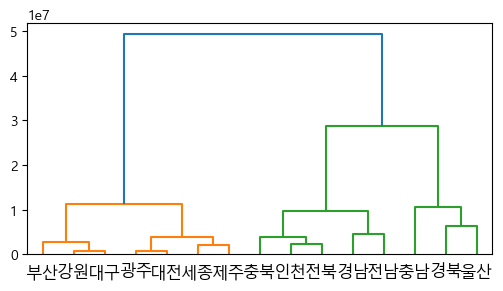

In [7]:
plt.figure(figsize=(6, 3))
dendrogram(link_dist, labels=list(power.index))

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [73.75, 73.75, 121.25, 121.25],
  [50.0, 50.0, 97.5, 97.5],
  [13.75, 13.75, 73.75, 73.75]],
 'dcoord': [[0.0, 0.35112173451673884, 0.35112173451673884, 0.0],
  [0.0, 0.7031395851260076, 0.7031395851260076, 0.35112173451673884],
  [0.0, 1.3737404620404814, 1.3737404620404814, 0.7031395851260076],
  [0.0, 0.8709770048417126, 0.8709770048417126, 0.0],
  [0.0, 0.27226463916122934, 0.27226463916122934, 0.0],
  [0.0, 0.861560932122164, 0.861560932122164, 0.27226463916122934],
  [0.0, 1.3106280151191987, 1.3106280151191987, 0.861560932122164],
  [0.0, 0.3289197431202892, 0.3289197431202892, 0.0],
  [0.0, 0.48562171500898477, 0.48562171500898477, 0.0],
  [0.0, 1.09

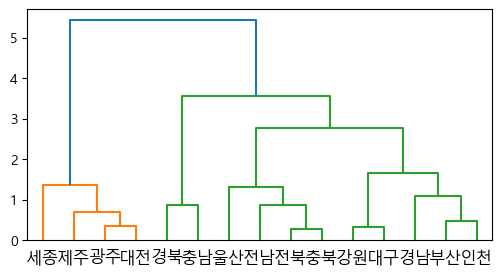

In [8]:
## 스케일링 - 전처리 진행
power[:]=StandardScaler().fit_transform(power[:])
link_dist = linkage(power, metric='euclidean', method='ward')
plt.figure(figsize=(6, 3))
dendrogram(link_dist, labels=list(power.index))

In [9]:
kmeans = KMeans(n_clusters=4).fit(power)## kmeans : 그룹핑 된 결과
centers = kmeans.cluster_centers_  ## 4개의 그룹의 중심점
power.loc[:,'클러스터']=kmeans.labels_
centers, power.loc[:,'클러스터'], power

(array([[ 0.75790833, -0.31260097],
        [-0.25141418,  0.52243609],
        [-1.25649503, -1.06099427],
        [ 1.12104758,  1.85861879]]),
 구분
 강원    0
 경남    0
 경북    3
 광주    2
 대구    0
 대전    2
 부산    0
 세종    2
 울산    1
 인천    0
 전남    1
 전북    1
 제주    2
 충남    3
 충북    1
 Name: 클러스터, dtype: int32,
         서비스업       제조업  클러스터
 구분                          
 강원  0.393992 -0.676282     0
 경남  1.498349  0.431200     0
 경북  1.417523  1.539632     3
 광주 -0.963503 -0.960380     2
 대구  0.065323 -0.689116     0
 대전 -0.613482 -0.988171     2
 부산  1.011798 -0.537491     0
 세종 -2.097244 -1.089755     2
 울산 -0.750871  1.150686     1
 인천  0.820080 -0.091316     0
 전남  0.164025  0.743660     1
 전북 -0.185723 -0.036357     1
 제주 -1.351751 -1.205671     2
 충남  0.824572  2.177606     3
 충북 -0.233088  0.231756     1)

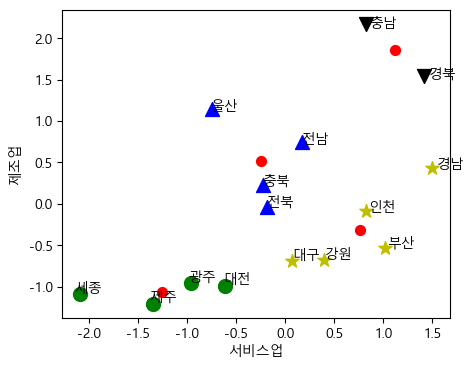

In [10]:
my_markers=['*','^', 'o','v','H']; my_color =['y','b','g','k', 'r']
plt.figure(figsize=(5, 4))
plt.xlabel('서비스업'); plt.ylabel('제조업')
for n in range(power.shape[0]): # 지역인 행만큼 반복
    label = kmeans.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], 
                c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])    
for i in range(kmeans.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)
plt.show()    

In [11]:
X, y = make_moons(n_samples=300, noise=1, random_state=11)
## 달모양의 데이터를 생성           노이즈         랜덤번호
X.shape, y.shape, type(X), type(y) ##, X, y

((300, 2), (300,), numpy.ndarray, numpy.ndarray)

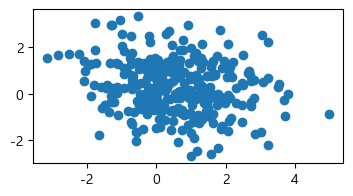

In [12]:
#원본데이터 차트
plt.figure(figsize=(4, 2))
plt.scatter(X[: , 0],X[: , 1])

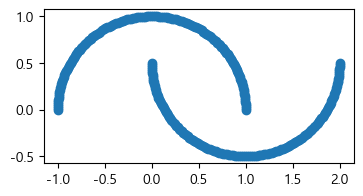

In [13]:
X, y = make_moons(n_samples=300, noise=0, random_state=11)
plt.figure(figsize=(4, 2))
plt.scatter(X[: , 0],X[: , 1])

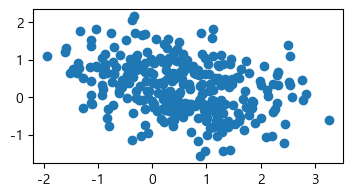

In [14]:
X, y = make_moons(n_samples=300, noise=0.5, random_state=11)
plt.figure(figsize=(4, 2))
plt.scatter(X[: , 0],X[: , 1])

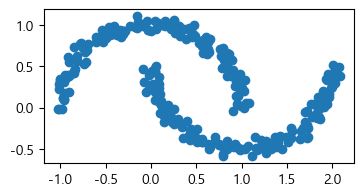

In [15]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=11)
plt.figure(figsize=(4, 2))
plt.scatter(X[: , 0],X[: , 1])

In [16]:
kmeans = KMeans(n_clusters=2).fit(X)  ## kmeans 알고리즘 적용시킴
centers = kmeans.cluster_centers_  
centers, kmeans

(array([[ 1.20233885, -0.07710819],
        [-0.19979515,  0.58266252]]),
 KMeans(n_clusters=2))

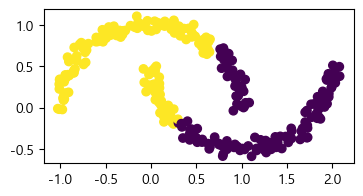

In [17]:
predict = KMeans(n_clusters=2).fit_predict(X) ## kmeans 알고리즘 적용 --> 결과 예상
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],c=predict)
##plt.scatter(X[:,0], X[:,1],c=kmeans)

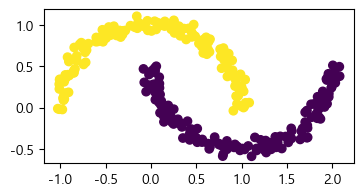

In [18]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')##DB스캔을 하기 위한 객체 선언
predict = dbscan.fit_predict(X)
plt.figure(figsize=(4, 2));plt.scatter(X[:,0], X[:,1],c=predict)

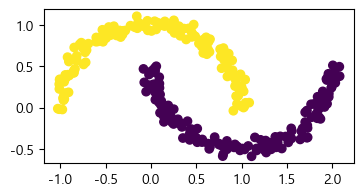

In [19]:
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.figure(figsize=(4, 2));plt.scatter(X[:,0], X[:,1],c=predict)

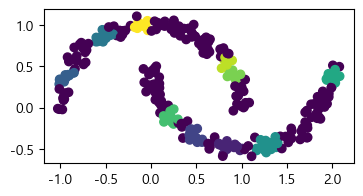

In [20]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')## eps=0.1 : 군집화를 하는 최소한의 밀도 거리
predict = dbscan.fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],c=predict)

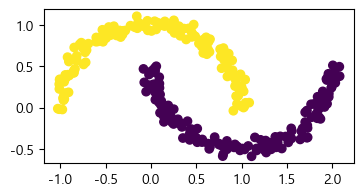

In [21]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],c=predict)

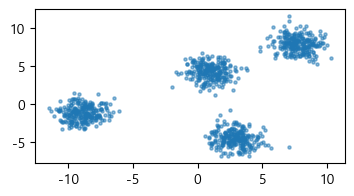

In [22]:
X, y = make_blobs(n_features=4, n_samples=1000, centers=4, cluster_std=1, random_state=3)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

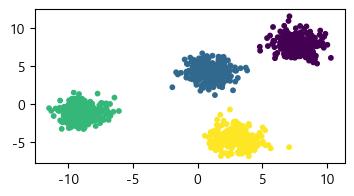

In [23]:
kmeans = KMeans(n_clusters=4)
aa=kmeans.fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],s=10, c=aa)

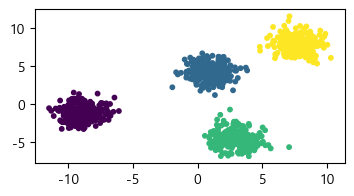

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

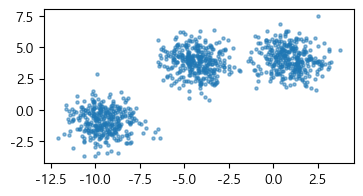

In [25]:
X, y = make_blobs(n_features=10, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

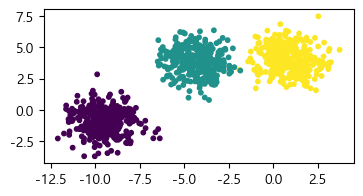

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

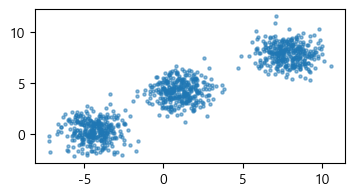

In [27]:
X, y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

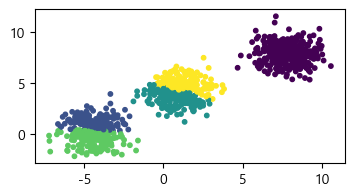

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

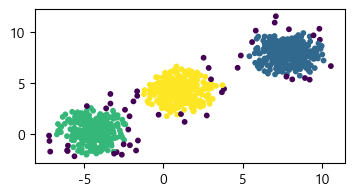

In [29]:
kk = DBSCAN(eps=0.5, min_samples=5, metric='euclidean').fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:,0], X[:,1],s=10, c=kk)

In [30]:
X2 = [[0, 1], [1, 1]]
euclidean_distances(X2, X2)

array([[0., 1.],
       [1., 0.]])

In [31]:
euclidean_distances(X2, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [32]:
cosine_distances(X2,X2)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [33]:
manhattan_distances(X2,X2)

array([[0., 1.],
       [1., 0.]])